In [13]:
library(dplyr)
library(ggplot2)
par(family = "AppleGothic")
theme_set(theme_gray(base_family="AppleGothic"))

In [11]:
gsub("\\([^)]*\\)","",'abc(ab)')

[1] "abc"

### 지하철 일자별 승하차 데이터 하나의 csv로 합치기

In [73]:
data_2019<-read.csv('data/2019.csv',header = T)
colnames(data_2019)<-c('날짜','호선','역번호','역명','구분','-06','06-07','07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24','24-','합계')
data_2019$`날짜`<-as.Date(data_2019$`날짜`,format='%Y.%m.%d')
#data_2019$요일 <- weekdays(data_2019$날짜)
data_2019$`23-`<-data_2019$`23-24`+data_2019$`24-`
data_2019 <- data_2019[,-(24:26)]
head(data_2019)

,날짜,호선,역번호,역명,구분,-06,06-07,07-08,08-09,09-10,⋯,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-
,<date>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2019-01-01,1호선,150,서울역,승차,348,321,348,741,940,⋯,2341,3370,3226,3447,3277,2898,2590,3004,2234,1008
2,2019-01-01,1호선,150,서울역,하차,222,821,808,961,1472,⋯,2360,2743,2491,2572,2060,1991,1683,1217,764,605
3,2019-01-01,1호선,151,시청,승차,87,98,143,206,280,⋯,868,946,958,1062,1146,1119,992,904,570,217
4,2019-01-01,1호선,151,시청,하차,48,237,323,571,577,⋯,875,964,733,746,606,374,311,268,177,201
5,2019-01-01,1호선,152,종각,승차,669,318,217,203,333,⋯,1294,1843,1870,2129,2024,1806,1796,1780,1296,528
6,2019-01-01,1호선,152,종각,하차,68,179,293,546,926,⋯,1771,1654,1379,1420,1050,685,431,315,237,201


In [77]:
# 24이후 column 버린다
data_2020<-read.csv('data/2020.csv',header = T,encoding = 'UTF-8')
colnames(data_2020)<-c('날짜','호선','역번호','역명','구분','-06','06-07','07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24','24-')
data_2020$`날짜`<-as.Date(data_2020$`날짜`,format='%Y.%m.%d')
data_2020$`23-`<-data_2020$`23-24`+data_2020$`24-`
data_2020<-data_2020[,-(24:25)]
head(data_2020)

,날짜,호선,역번호,역명,구분,-06,06-07,07-08,08-09,09-10,⋯,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-
,<date>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2020-01-01,1호선,150,서울역,승차,356,280,313,774,923,⋯,2065,2972,3194,3342,3002,2857,2311,2523,1830,1012
2,2020-01-01,1호선,150,서울역,하차,235,952,828,1043,1694,⋯,2308,2286,2354,2261,1922,1696,1620,1181,768,503
3,2020-01-01,1호선,151,시청,승차,105,118,123,206,318,⋯,763,873,1019,1234,1383,1271,1061,991,572,219
4,2020-01-01,1호선,151,시청,하차,81,223,334,570,611,⋯,1021,885,783,849,602,435,293,273,174,175
5,2020-01-01,1호선,152,종각,승차,798,366,198,236,310,⋯,1190,1636,1748,1890,1879,1827,1955,1800,1259,412
6,2020-01-01,1호선,152,종각,하차,71,191,295,511,855,⋯,1439,1610,1450,1352,1132,725,545,344,225,171


In [78]:
data_2021<-read.csv('data/2021.csv',header = T,encoding = 'UFF-8')
colnames(data)<-c('날짜','호선','역번호','역명','구분','-06','06-07','07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-','요일')
data_2021$`날짜`<-as.Date(data_2021$`날짜`,format='%Y.%m.%d')
head(data_2021)

,날짜,호선,역번호,역명,구분,-06,06-07,07-08,08-09,09-10,⋯,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-
,<date>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2021-01-01,1호선,150,서울역,승차,86,111,157,306,333,⋯,674,837,796,839,658,579,479,510,445,101
2,2021-01-01,1호선,150,서울역,하차,85,355,438,592,841,⋯,791,781,710,626,437,425,354,307,134,77
3,2021-01-01,1호선,151,시청,승차,43,45,75,111,95,⋯,189,227,233,347,294,186,216,204,110,29
4,2021-01-01,1호선,151,시청,하차,40,145,176,312,223,⋯,200,158,140,152,121,57,54,64,23,17
5,2021-01-01,1호선,152,종각,승차,49,59,89,126,125,⋯,398,513,548,504,572,492,593,513,130,31
6,2021-01-01,1호선,152,종각,하차,34,116,178,304,391,⋯,480,432,478,415,274,117,75,72,29,19


In [90]:
data_all <- rbind(data_2019,data_2020,data_2021)
data_all$요일 <- weekdays(data_all$날짜)
head(data_all)

,날짜,호선,역번호,역명,구분,-06,06-07,07-08,08-09,09-10,⋯,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-,요일
,<date>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,2019-01-01,1호선,150,서울역,승차,348,321,348,741,940,⋯,3370,3226,3447,3277,2898,2590,3004,2234,1008,화요일
2,2019-01-01,1호선,150,서울역,하차,222,821,808,961,1472,⋯,2743,2491,2572,2060,1991,1683,1217,764,605,화요일
3,2019-01-01,1호선,151,시청,승차,87,98,143,206,280,⋯,946,958,1062,1146,1119,992,904,570,217,화요일
4,2019-01-01,1호선,151,시청,하차,48,237,323,571,577,⋯,964,733,746,606,374,311,268,177,201,화요일
5,2019-01-01,1호선,152,종각,승차,669,318,217,203,333,⋯,1843,1870,2129,2024,1806,1796,1780,1296,528,화요일
6,2019-01-01,1호선,152,종각,하차,68,179,293,546,926,⋯,1654,1379,1420,1050,685,431,315,237,201,화요일


In [137]:
write.csv(data_all,'data/data.csv',row.names=F)

### covid metro 데이터 저장 
- metro data 2019-01-01 부터 시작 
- covid data 2020-02-28 부터 시작

In [98]:
length(unique(metro$`역명`))

[1] 252

In [1]:
metro<- read.csv('data/data.csv',encoding = 'UTF-8')
colnames(metro)<-c('날짜','호선','역번호','역명','구분','-06','06-07','07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-','요일')
metro$합계 <-apply(metro[,6:24],1,sum)
metro$`날짜`<-as.Date(metro$`날짜`,format = '%Y-%m-%d')
head(metro)

,날짜,호선,역번호,역명,구분,-06,06-07,07-08,08-09,09-10,⋯,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-,요일,합계
,<date>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>
1,2019-01-01,1호선,150,서울역,승차,348,321,348,741,940,⋯,3226,3447,3277,2898,2590,3004,2234,1008,화요일,39559
2,2019-01-01,1호선,150,서울역,하차,222,821,808,961,1472,⋯,2491,2572,2060,1991,1683,1217,764,605,화요일,31279
3,2019-01-01,1호선,151,시청,승차,87,98,143,206,280,⋯,958,1062,1146,1119,992,904,570,217,화요일,11836
4,2019-01-01,1호선,151,시청,하차,48,237,323,571,577,⋯,733,746,606,374,311,268,177,201,화요일,10359
5,2019-01-01,1호선,152,종각,승차,669,318,217,203,333,⋯,1870,2129,2024,1806,1796,1780,1296,528,화요일,21042
6,2019-01-01,1호선,152,종각,하차,68,179,293,546,926,⋯,1379,1420,1050,685,431,315,237,201,화요일,16750


In [8]:
covid <- read.csv('data/코로나동향.csv',header = T)
covid$`자치구.기준일`<- as.Date(covid$`자치구.기준일`,format = '%Y.%m.%d')
colnames(covid) <- gsub('\\.',' ',colnames(covid))

covid_new <- covid[,seq(1,53,2)]            
covid_new$합계 <- apply(covid_new[,-1],1,sum)
covid_new <- covid_new[,c(1,28)]
covid_new <- covid_new[seq(518,1,-1),]
row.names(covid_new) <- c()
head(covid_new)

,자치구 기준일,합계
,<date>,<int>
1,2020-02-28,9
2,2020-02-29,12
3,2020-03-01,5
4,2020-03-02,5
5,2020-03-03,6
6,2020-03-04,0


In [44]:
# 별 의미없는 지표가 나온다
cor(x$일별총이용량,y$합계)

[1] -0.1126667

### 2020-11-24 9시 이후 영업 금지 조치 처음 실행
- 예년에 비해 9시 영업 금지 조치 후 이용량 변화
- 한달 전후로 9시 영업 금지 조치 후 이용량 변화

Warning message in wilcox.test.default(metro_after6_month_passed$합계, metro_after6_year_ago$합계, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  metro_after6_month_passed$합계 and metro_after6_year_ago$합계
W = 8.5, p-value = 3.515e-11
alternative hypothesis: true location shift is less than 0



	Wilcoxon rank sum exact test

data:  metro_after6_month_passed$합계 and metro_after6_month_ago$합계
W = 125, p-value = 1.569e-07
alternative hypothesis: true location shift is less than 0


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of metro_after6_month_passed$합계' in 'mbcsToSbcs': dot substituted for <ed>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of metro_after6_month_passed$합계' in 'mbcsToSbcs': dot substituted for <95>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of metro_after6_month_passed$합계' in 'mbcsToSbcs': dot substituted for <a9>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of metro_after6_month_passed$합계' in 'mbcsToSbcs': dot substituted for <ea>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of metro_after6_month_passed$합계' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in title(main = main, sub = s

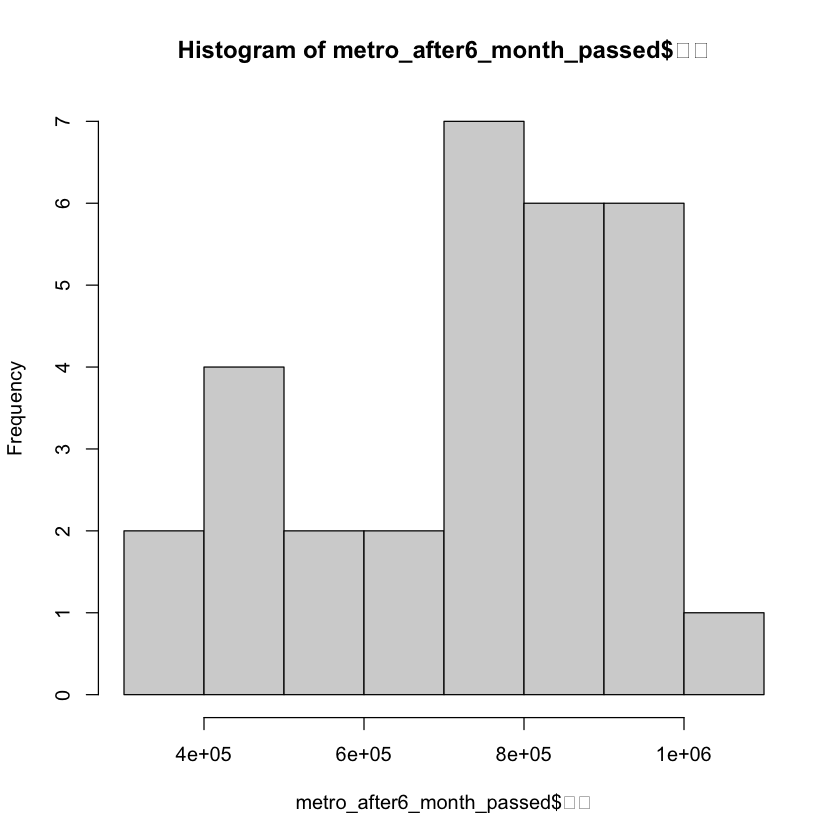

Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of metro_after6_year_ago$합계' in 'mbcsToSbcs': dot substituted for <ed>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of metro_after6_year_ago$합계' in 'mbcsToSbcs': dot substituted for <95>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of metro_after6_year_ago$합계' in 'mbcsToSbcs': dot substituted for <a9>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of metro_after6_year_ago$합계' in 'mbcsToSbcs': dot substituted for <ea>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of metro_after6_year_ago$합계' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in title(main = main, sub = sub, xlab = xlab, yla

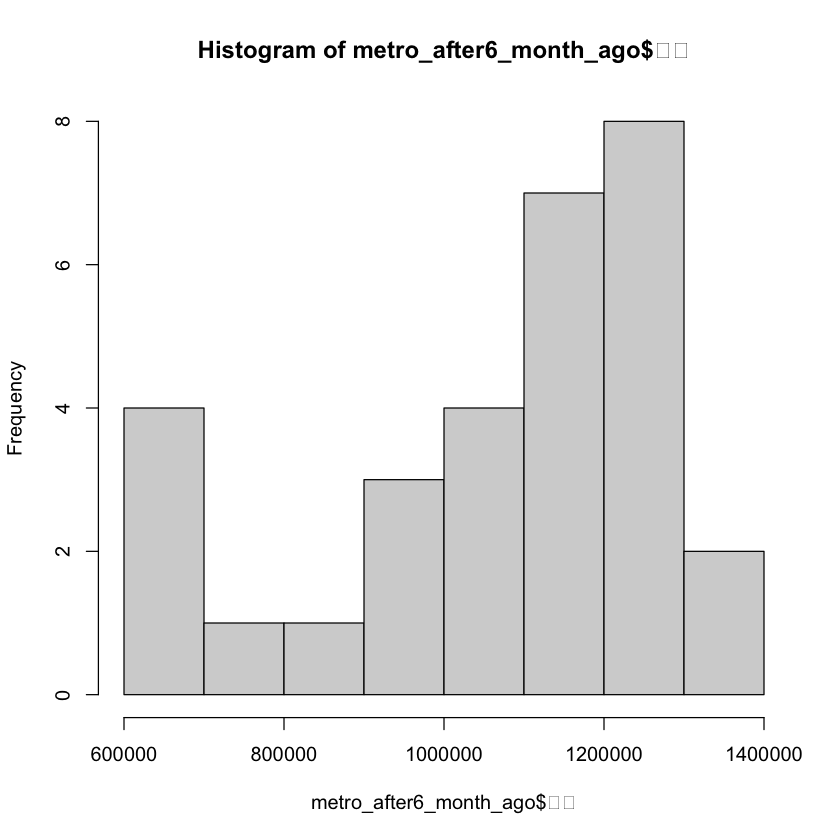

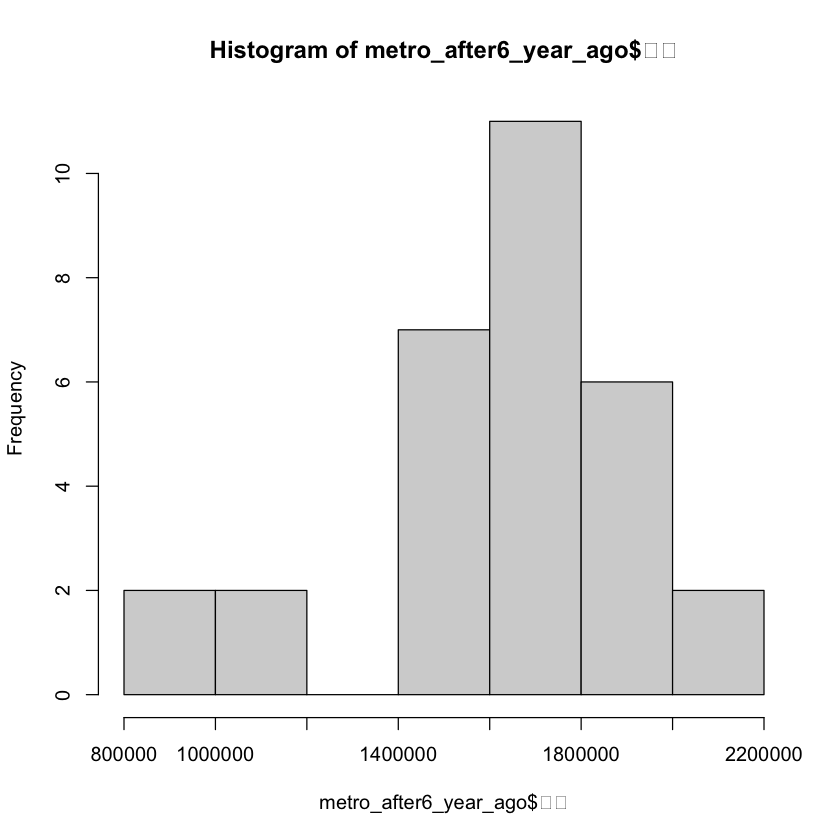

In [73]:
metro_after6<-metro[,c('날짜','호선','역명','구분','20-21','21-22','22-23','23-')]
metro_after6<- metro_after6  %>%
    mutate(합계 = apply(metro_after6[,5:8],1,sum)) %>% 
    group_by(날짜) %>% 
    summarize(합계 = sum(합계))

metro_after6_month_ago<-metro_after6[metro_after6$날짜 %in% c(as.Date('2020-11-24')-30:1),]
metro_after6_year_ago<-metro_after6[metro_after6$날짜 %in% c(as.Date('2019-11-24')+1:30),]
metro_after6_month_passed<-metro_after6[metro_after6$날짜 %in% c(as.Date('2020-11-24')+1:30),]

# 예년과 비교
wilcox.test(metro_after6_month_passed$합계,metro_after6_year_ago$합계,alternative = 'less')

# 한달 저후로 비교
wilcox.test(metro_after6_month_passed$합계,metro_after6_month_ago$합계,alternative = 'less')

hist(metro_after6_month_passed$합계)
hist(metro_after6_month_ago$합계)
hist(metro_after6_year_ago$합계)

### 9시 금지 조치 => 주말에도 영향을 끼쳤나?


	Wilcoxon rank sum exact test

data:  metro_weekend_month_passed$합계 and metro_weekend_month_ago$합계
W = 13, p-value = 0.0137
alternative hypothesis: true location shift is less than 0


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of metro_weekend_month_ago$합계' in 'mbcsToSbcs': dot substituted for <ed>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of metro_weekend_month_ago$합계' in 'mbcsToSbcs': dot substituted for <95>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of metro_weekend_month_ago$합계' in 'mbcsToSbcs': dot substituted for <a9>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of metro_weekend_month_ago$합계' in 'mbcsToSbcs': dot substituted for <ea>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of metro_weekend_month_ago$합계' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in title(main = main, sub = sub, xlab =

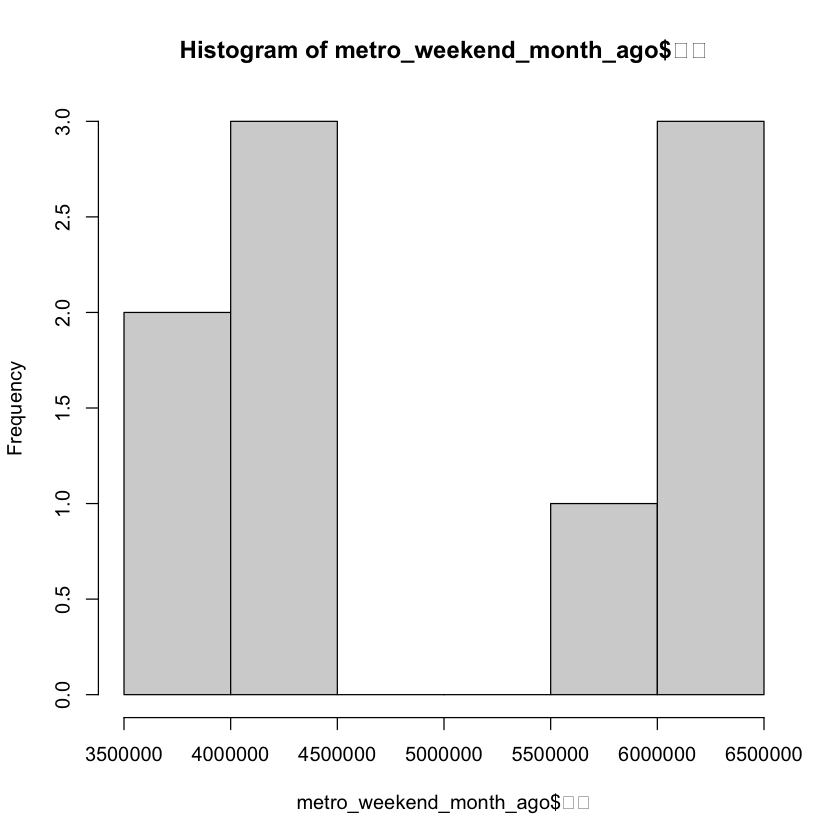

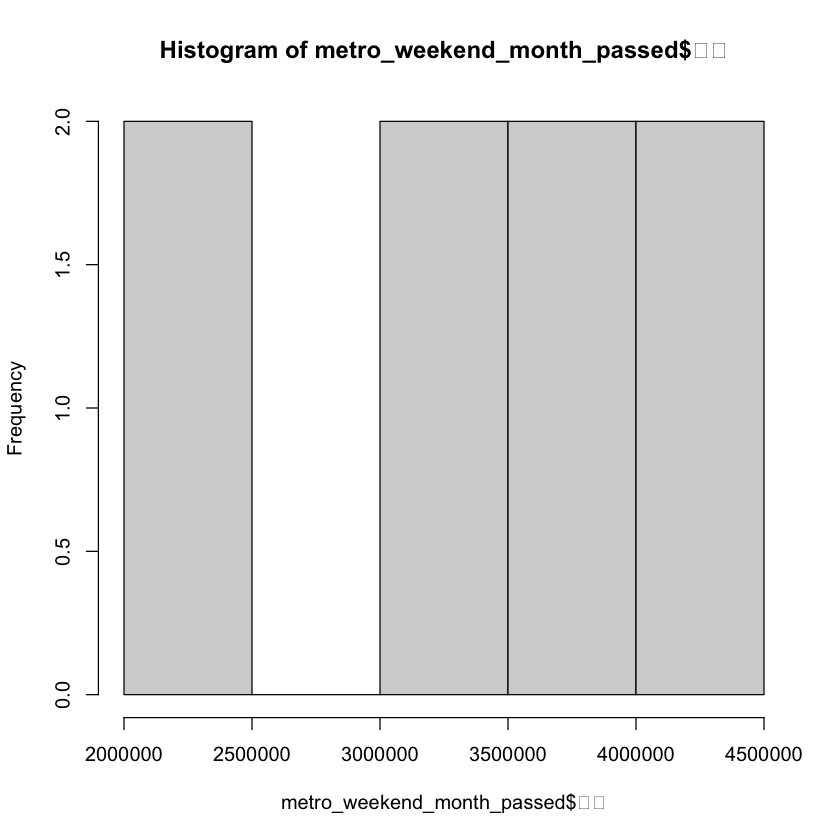

In [90]:
metro_weekend <- metro %>% mutate(합계 = apply(metro[,6:24],1,sum)) %>% 
    filter(요일 =='토요일' | 요일=='일요일') %>% 
    group_by(날짜) %>% 
    summarize(합계 = sum(합계))

metro_weekend_month_ago<-metro_weekend[metro_weekend$날짜 %in% c(as.Date('2020-11-24')-30:1),]
metro_weekend_month_passed<-metro_weekend[metro_weekend$날짜 %in% c(as.Date('2020-11-24')+1:30),]
wilcox.test(metro_weekend_month_passed$합계,metro_weekend_month_ago$합계,alt='less')
hist(metro_weekend_month_ago$합계)
hist(metro_weekend_month_passed$합계)

### 5인 이상 집합 금지


	Wilcoxon rank sum exact test

data:  metro_after6_month_passed$합계 and metro_after6_month_ago$합계
W = 390, p-value = 0.1909
alternative hypothesis: true location shift is less than 0


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of metro_after6_month_passed$합계' in 'mbcsToSbcs': dot substituted for <ed>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of metro_after6_month_passed$합계' in 'mbcsToSbcs': dot substituted for <95>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of metro_after6_month_passed$합계' in 'mbcsToSbcs': dot substituted for <a9>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of metro_after6_month_passed$합계' in 'mbcsToSbcs': dot substituted for <ea>”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Histogram of metro_after6_month_passed$합계' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in title(main = main, sub = s

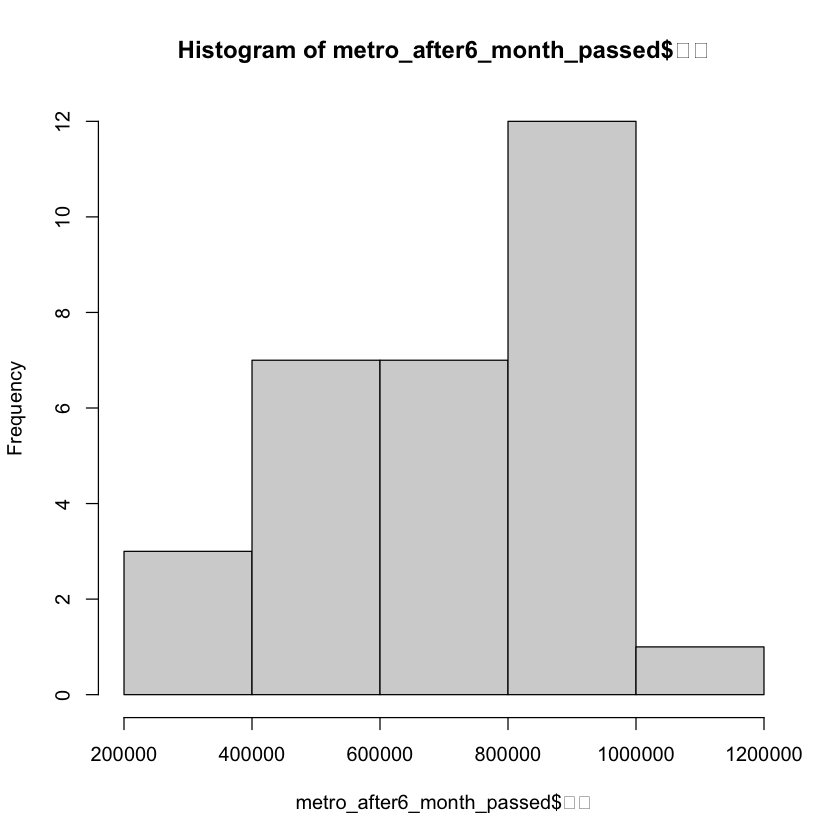

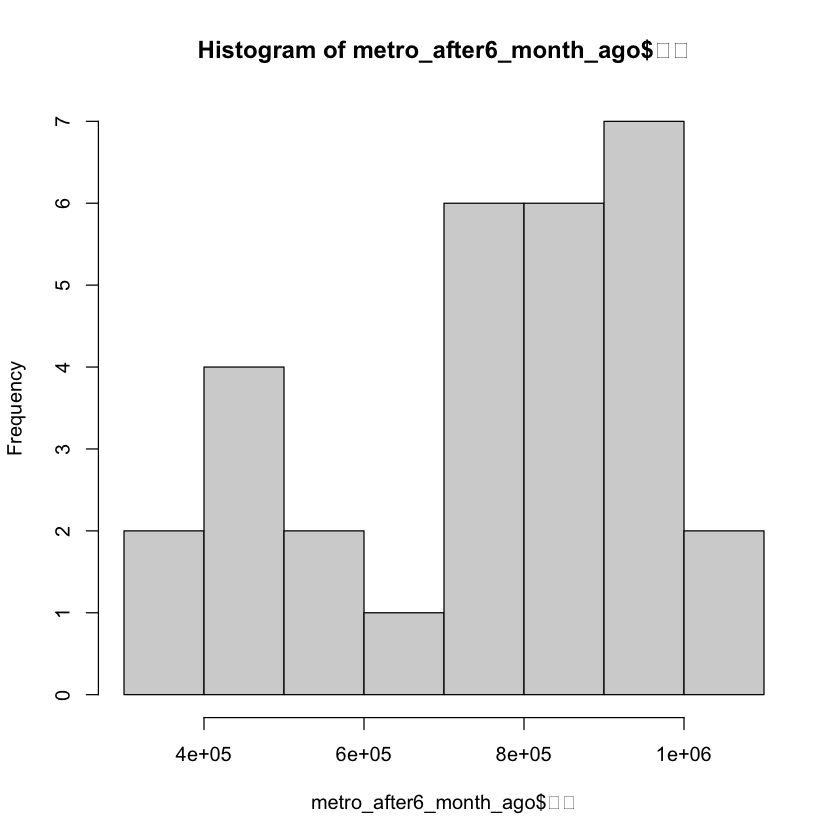

In [91]:
metro_after6<-metro[,c('날짜','호선','역명','구분','20-21','21-22','22-23','23-')]
metro_after6<- metro_after6  %>%
    mutate(합계 = apply(metro_after6[,5:8],1,sum)) %>% 
    group_by(날짜) %>% 
    summarize(합계 = sum(합계))

metro_after6_month_ago<-metro_after6[metro_after6$날짜 %in% c(as.Date('2020-12-23')-30:1),]
metro_after6_year_ago<-metro_after6[metro_after6$날짜 %in% c(as.Date('2019-11-24')+1:30),]
metro_after6_month_passed<-metro_after6[metro_after6$날짜 %in% c(as.Date('2020-12-23')+1:30),]

# 한달 저후로 비교
wilcox.test(metro_after6_month_passed$합계,metro_after6_month_ago$합계,alternative = 'less')

hist(metro_after6_month_passed$합계)
hist(metro_after6_month_ago$합계)


In [6]:
library(dplyr)
metro<- read.csv('./data/data.csv',encoding = 'UTF-8')
colnames(metro)<-c('날짜','호선','역번호','역명','구분','-06','06-07','07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-','요일')
metro$합계 <-apply(metro[,6:24],1,sum)
metro$`날짜`<-as.Date(metro$`날짜`,format = '%Y-%m-%d')
metro <- metro %>% filter(날짜 >=as.Date('2020-02-28'))  %>% group_by(날짜) %>% 
  summarize(일별총이용량 = sum(합계))
metro <- as.data.frame(metro)
colnames(metro) <- c('날짜','합계')
head(metro)


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,날짜,합계
,<date>,<int>
1,2020-02-28,6834508
2,2020-02-29,3703815
3,2020-03-01,2396254
4,2020-03-02,6731379
5,2020-03-03,6755432
6,2020-03-04,6737877


In [10]:
covid <- read.csv('./data/코로나동향.csv',header = T)
covid$`자치구.기준일`<- as.Date(covid$`자치구.기준일`,format = '%Y.%m.%d')
colnames(covid) <- gsub('\\.',' ',colnames(covid))

covid_new <- covid[,seq(1,53,2)]            
covid_new$합계 <- apply(covid_new[,-1],1,sum)
covid_new <- covid_new[,c(1,28)]
covid_new <- covid_new[seq(518,1,-1),]
row.names(covid_new) <- c()
covid_new <- covid_new %>% filter(`자치구 기준일`<=as.Date('2021-05-31'))
colnames(covid_new) <- c('날짜','합계')
tail(covid_new)


,날짜,합계
,<date>,<int>
454,2021-05-26,262
455,2021-05-27,218
456,2021-05-28,214
457,2021-05-29,194
458,2021-05-30,160
459,2021-05-31,130


날짜,합계,구분
<date>,<int>,<chr>
2020-02-28,6834508,이용량
2020-02-29,3703815,이용량
2020-03-01,2396254,이용량
2020-03-02,6731379,이용량
2020-03-03,6755432,이용량
2020-03-04,6737877,이용량
2020-03-05,6774786,이용량
2020-03-06,7002947,이용량
2020-03-07,3947455,이용량


Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“PostScript 폰트 데이터베이스에서 

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“PostScript 폰트 데이터베이스에서 

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_tex

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call.graph

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_tex

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'NanumGothic'입니다”
Warning message in grid.Call(C_

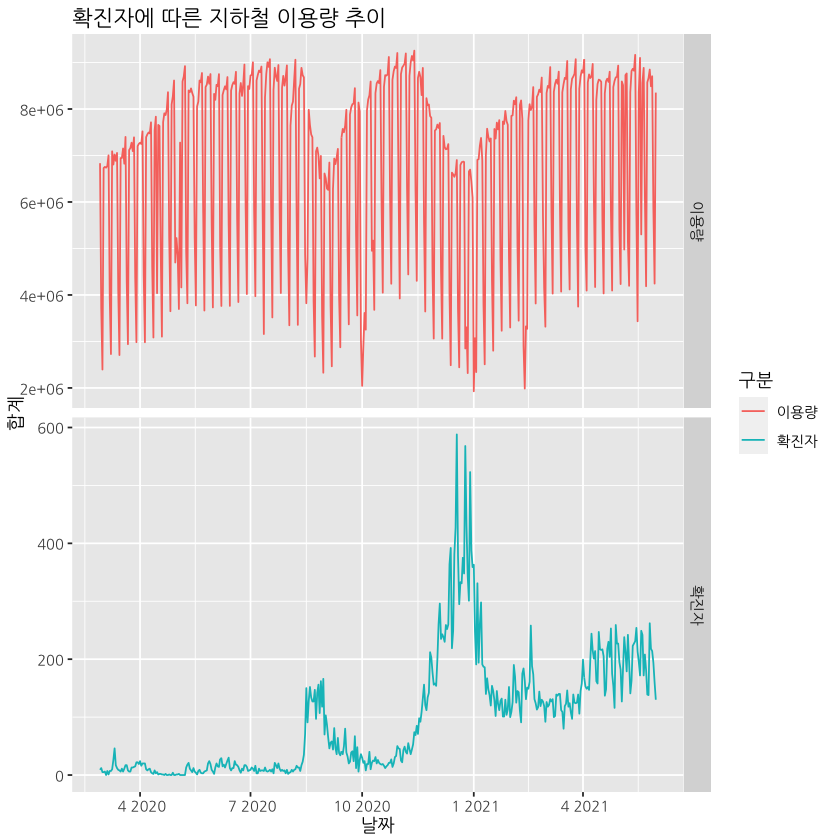

In [35]:
theme_set(theme_gray(base_family="NanumGothic"))

metro$구분 ='이용량'
covid_new $구분 ='확진자'
rbind(metro,covid_new)

ggplot(data = rbind(metro,covid_new),aes(x=날짜,y=합계,col=구분))+
  geom_line()+
  ggtitle('확진자에 따른 지하철 이용량 추이')+
  facet_grid(구분~.,scales='free')


In [30]:
install.packages('showtext')

‘sysfonts’, ‘showtextdb’(들)을 또한 설치합니다.





The downloaded binary packages are in
	/var/folders/v3/m9cgmw1d3qs7ppj4ltvx26pc0000gn/T//Rtmpd7jE0d/downloaded_packages
